<a href="https://colab.research.google.com/github/wo1fie3608/Open-Source-Lab-1/blob/main/knn_bda_project_iphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [308]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
data=pd.read_csv('/content/drive/MyDrive/iphone_purchase_records.csv')
print(data)
gender_bin=pd.get_dummies(data["Gender"])
data=pd.concat((gender_bin, data),axis=1)
data=data.drop(["Gender"], axis=1)
print(data)

     Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]
     Female  Male  Age  Salary  Purchase Iphone
0         0     1   19   19000                0
1         0     1   35   20000                0
2         1     0   26   43000                0
3         1     0   27   57000                0
4         0     1   19   76000                0
..      ...   ...  ...     ...              ...
395       1     0   46   41000                1
396       0     1   51   23000                1
397       1     0   50   20000          

In [310]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=128)
scale= StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [311]:
def knearest(X_traint,X_testt,k,y_traint):
  X_traint=X_traint.to_numpy()
  X_testt=X_testt.to_numpy()
  euclidian_distance=(X_traint-X_testt)**2
  euclidian_distance=np.sum(euclidian_distance, axis = 1)**0.5
  temp=[]
  ind=0
  for i in euclidian_distance:
    temp.append([i,ind])
    ind=ind+1
  temp=np.array(temp)
  temp_sorted = temp[np.argsort(temp[:, 0])]
  zero=0
  one=0
  for i in range(k):
    if(y_traint.iloc[int(temp_sorted[i][1])]==0):
      zero=zero+1
    else:
      one=one+1
  if(one>zero):
    return 1
  else:
    return 0



In [312]:
k=1
accuracy=0
incorrectfinal=len(X_test)
recallfinal=0
precisionfinal=0
fscorefinal=0
for i in range(1,int(len(X_test**0.5)),2):
  correct=0
  tn=0
  fp=0
  fn=0
  tp=0
  for j in range(0,len(X_test)):
    predicted=knearest(X_train,X_test.iloc[j,:],i,y_train)
    if(y_test.iloc[j]==0):
      if(predicted==0):
        tn+=1
      else:
        fp+=1
    else:
      if(predicted==0):
        fn+=1
      else:
        tp+=1
    correct+=(predicted==y_test.iloc[j])
  incorrect=len(X_test)-correct
  correct=correct/len(X_test)
  if(accuracy<correct):
    accuracy=correct
    k=i
    incorrectfinal=incorrect
    recallfinal=tp/(tp+fn)
    precisionfinal=tp/(tp+fp)
    fscorefinal=2*recallfinal*precisionfinal/(precisionfinal+recallfinal)
    
print("Best K value is:",k," with accuracy: ",accuracy*100,"%")

Best K value is: 5  with accuracy:  94.16666666666667 %


In [313]:
results={}
results["accuracy"]=accuracy*100
results["precision"]=precisionfinal*100
results["recall"]=recallfinal*100
results["f1score"]=fscorefinal*100

In [314]:
print(results)


{'accuracy': 94.16666666666667, 'precision': 92.6829268292683, 'recall': 90.47619047619048, 'f1score': 91.56626506024097}


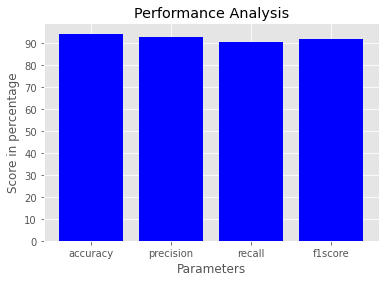

In [315]:
parameters = list(results.keys())
values = list(results.values())  
plt.style.use('ggplot')
plt.locator_params(axis="y", nbins=15)
plt.bar(parameters, values, color ='blue')
plt.xlabel("Parameters")
plt.ylabel("Score in percentage")
plt.title("Performance Analysis")
plt.show()

In [316]:
results["incorrect"]=incorrectfinal

In [317]:
for i in results:
  print(i+": ",results[i],end='')
  if(results[i]>70):
    print(" %")
  else:
    print()

accuracy:  94.16666666666667 %
precision:  92.6829268292683 %
recall:  90.47619047619048 %
f1score:  91.56626506024097 %
incorrect:  7
